In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib import style
#style.use('fivethirtyeight')
import seaborn as sns
#sns.set(style = 'white', color_code=True)
# import warnings
# warnings.filterwarnings('ignore')
# sns.set_style('whitegrid')

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search
# from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
df = pd.read_csv('train_modified27jan.csv')
dtest = pd.read_csv('test_modified27jan.csv')

In [3]:
df.head()

,Credit_History,Loan_ID,Loan_Status,Total_Income_log,LoanAmount_log,Loan_Amount_Term_log,EMI,Ratio,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Property_Area_0,Property_Area_1,Property_Area_2
0,1.0,LP001002,Y,8.674026,4.841041,5.886104,0.822452,0.558108,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,LP001003,N,8.714568,4.852030,5.886104,0.824319,0.556772,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,LP001005,Y,8.006368,4.189655,5.886104,0.711787,0.523290,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,LP001006,Y,8.505323,4.787492,5.886104,0.813355,0.562882,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,LP001008,Y,8.699515,4.948760,5.886104,0.840753,0.568855,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [4]:
X_test = dtest.drop('Loan_ID',axis=1)
X_test.head()

,Credit_History,Total_Income_log,LoanAmount_log,Loan_Amount_Term_log,EMI,Ratio,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Property_Area_0,Property_Area_1,Property_Area_2
0,1.0,8.651724,4.841041,5.886104,0.822452,0.559546,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,8.428581,4.836282,5.886104,0.821644,0.573796,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,8.824678,5.337538,5.886104,0.906803,0.604842,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,8.494129,4.605170,5.886104,0.782380,0.542159,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,8.094378,4.356709,5.886104,0.740169,0.538239,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [5]:
target = 'Loan_Status'
IDcol = 'Loan_ID'
df.head()

,Credit_History,Loan_ID,Loan_Status,Total_Income_log,LoanAmount_log,Loan_Amount_Term_log,EMI,Ratio,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Property_Area_0,Property_Area_1,Property_Area_2
0,1.0,LP001002,Y,8.674026,4.841041,5.886104,0.822452,0.558108,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,LP001003,N,8.714568,4.852030,5.886104,0.824319,0.556772,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,LP001005,Y,8.006368,4.189655,5.886104,0.711787,0.523290,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,LP001006,Y,8.505323,4.787492,5.886104,0.813355,0.562882,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,LP001008,Y,8.699515,4.948760,5.886104,0.840753,0.568855,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [6]:
from sklearn.linear_model import LogisticRegression
predictors = [x for x in df.columns if x not in [target, IDcol]]
logReg = LogisticRegression(fit_intercept = False,C = 1e9)
logReg.fit(df[predictors],df['Loan_Status'])
print(logReg.coef_)
print(logReg.get_params())
dtrain_predictions = logReg.predict(X_test)
logReg.score(df[predictors],df['Loan_Status'])

[[  3.9088322   -0.74957745   1.58448625  -0.52888967  -2.56700679
  -13.5790821    2.51598424   3.0988934    1.43704342   1.01384419
    1.72100321   1.44298683   2.9880296    2.62684803   1.49869985
    2.41484457   1.70133322]]
{'intercept_scaling': 1, 'penalty': 'l2', 'class_weight': None, 'random_state': None, 'tol': 0.0001, 'warm_start': False, 'solver': 'liblinear', 'fit_intercept': False, 'max_iter': 100, 'C': 1000000000.0, 'n_jobs': 1, 'dual': False, 'multi_class': 'ovr', 'verbose': 0}


0.80944625407166126

## Cross Validation

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,df[predictors],df['Loan_Status'],cv=10,scoring='accuracy')
print(scores)

[ 0.73015873  0.79365079  0.70491803  0.70491803  0.81967213  0.80327869
  0.81967213  0.73770492  0.75409836  0.73770492]


In [10]:
print(scores.mean())

0.760577673692


In [18]:
k_range = range(1,10)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,df[predictors],df['Loan_Status'],cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)    
    

[0.69372885766328396, 0.64342961228207129, 0.75586781160551664, 0.71001821493624773, 0.7605776736924279, 0.74100962789487379, 0.71017434296122828, 0.71514441842310694, 0.71837106427270359]


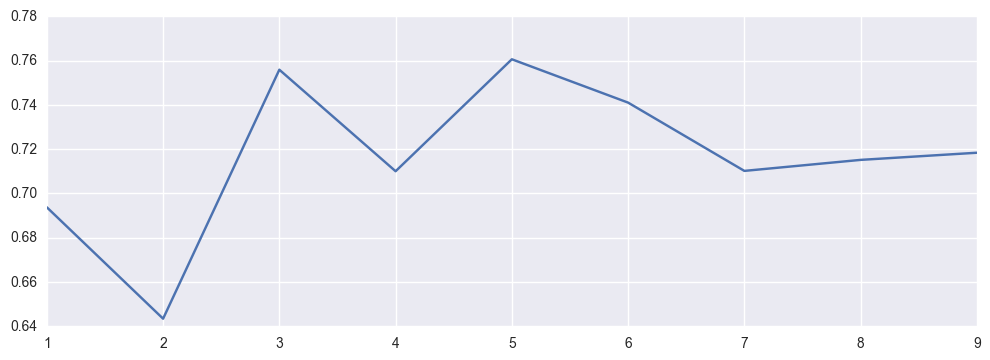

In [19]:
plt.plot(k_range,k_scores)

## GridSearchCV

In [21]:
from sklearn.grid_search import GridSearchCV
k_range = list(range(1,11))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [22]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [23]:
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')

In [24]:
grid.fit(df[predictors],df['Loan_Status'])

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [25]:
grid.grid_scores_

[mean: 0.69381, std: 0.03442, params: {'n_neighbors': 1},
 mean: 0.64332, std: 0.04467, params: {'n_neighbors': 2},
 mean: 0.75570, std: 0.02541, params: {'n_neighbors': 3},
 mean: 0.71010, std: 0.04032, params: {'n_neighbors': 4},
 mean: 0.76059, std: 0.04256, params: {'n_neighbors': 5},
 mean: 0.74104, std: 0.04183, params: {'n_neighbors': 6},
 mean: 0.71010, std: 0.02805, params: {'n_neighbors': 7},
 mean: 0.71498, std: 0.03029, params: {'n_neighbors': 8},
 mean: 0.71824, std: 0.03256, params: {'n_neighbors': 9},
 mean: 0.71498, std: 0.03245, params: {'n_neighbors': 10}]

In [29]:
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 0.66666667  0.74603175  0.63934426  0.67213115  0.6557377   0.73770492
  0.72131148  0.72131148  0.68852459  0.68852459]
0.693811074919


In [31]:
grid_mean_score = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_score)

[0.69381107491856675, 0.64332247557003253, 0.75570032573289903, 0.71009771986970682, 0.76058631921824105, 0.74104234527687296, 0.71009771986970682, 0.71498371335504884, 0.71824104234527686, 0.71498371335504884]


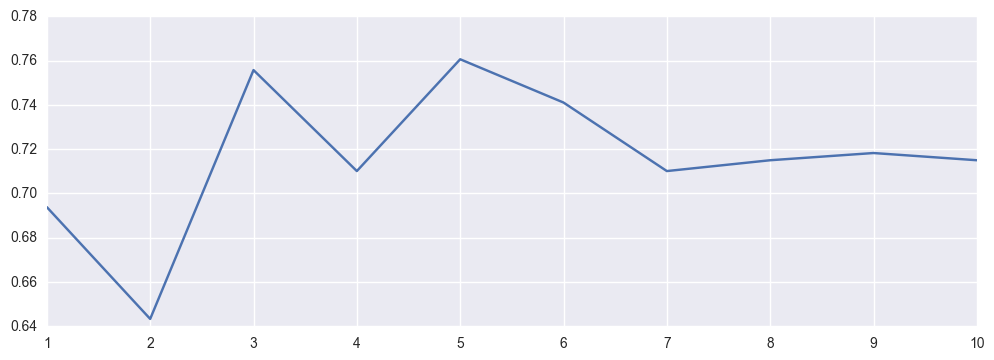

In [32]:
plt.plot(k_range,grid_mean_score)

In [34]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.760586319218
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [40]:
weight_options = ['uniform','distance']
param_grid1 = dict(n_neighbors=k_range,weights=weight_options)

grid1 = GridSearchCV(knn,param_grid1,cv=10,scoring='accuracy')
grid1.fit(df[predictors],df['Loan_Status'])
# print(grid1.grid_scores_)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.760586319218
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [41]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn.fit(df[predictors],df['Loan_Status'])
dtrain_predictions = knn.predict(X_test)

In [42]:
submission = pd.DataFrame({
        'Loan_ID':dtest['Loan_ID'],
        'Loan_Status':dtrain_predictions
    })
submission.to_csv('Loan_Prediction.csv',index=False)

## RandomizedSearch CV

In [43]:
from sklearn.grid_search import RandomizedSearchCV

grid_param = dict(n_neignbors=k_range,weights=weight_options)
rand = RandomizedSearchCV(knn,param_grid,n_iter=10,random_state=5,scoring='accuracy')
rand.fit(df[predictors],df['Loan_Status'])
rand.grid_scores_

[mean: 0.70847, std: 0.00431, params: {'n_neighbors': 1},
 mean: 0.65472, std: 0.00963, params: {'n_neighbors': 2},
 mean: 0.73616, std: 0.02209, params: {'n_neighbors': 3},
 mean: 0.70684, std: 0.02465, params: {'n_neighbors': 4},
 mean: 0.72150, std: 0.01453, params: {'n_neighbors': 5},
 mean: 0.70521, std: 0.04145, params: {'n_neighbors': 6},
 mean: 0.70358, std: 0.02008, params: {'n_neighbors': 7},
 mean: 0.71173, std: 0.02833, params: {'n_neighbors': 8},
 mean: 0.71498, std: 0.00877, params: {'n_neighbors': 9},
 mean: 0.72476, std: 0.00876, params: {'n_neighbors': 10}]

In [44]:
rand.best_score_

0.73615635179153094

In [89]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
X_train,X_test,Y_train,Y_test = train_test_split(df[predictors],df['Loan_Status'],random_state=0)
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)
Y_pred_class = logReg.predict(X_test)
print(metrics.accuracy_score(Y_pred_class,Y_test))
# dtrain_predictions

0.831168831169


In [93]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y_pred_class = np.array([number[0] for number in lb.fit_transform(Y_pred_class)])
Y_test = np.array([number[0] for number in lb.fit_transform(Y_test.values)])

In [95]:
print('True:',Y_test[0:18])
print('Pred:',Y_pred_class[0:18])

True: [1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1]
Pred: [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [96]:
print(metrics.confusion_matrix(Y_test,Y_pred_class))

[[ 19  24]
 [  2 109]]


In [102]:
confusion = metrics.confusion_matrix(Y_test,Y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [103]:
confusion

array([[ 19,  24],
       [  2, 109]])

In [104]:
#Classification Accuracy
print(metrics.accuracy_score(Y_test, Y_pred_class))

0.831168831169


In [105]:
#Classification Error or Mis-Classfication Rate
print(1-metrics.accuracy_score(Y_test,Y_pred_class))

0.168831168831


In [106]:
#Sensitivity or Recall Score
print(metrics.recall_score(Y_test,Y_pred_class))

0.981981981982


In [107]:
#Precision Score
print(metrics.precision_score(Y_test, Y_pred_class))

0.81954887218


In [122]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
output = logReg.predict(X_test)
output = np.array([number[0] for number in lb.fit_transform(output)])

In [123]:
logReg.predict_proba(X_test)[0:10, :]

array([[ 0.14736298,  0.85263702],
       [ 0.18059711,  0.81940289],
       [ 0.28570634,  0.71429366],
       [ 0.19107907,  0.80892093],
       [ 0.10537759,  0.89462241],
       [ 0.93873828,  0.06126172],
       [ 0.20641333,  0.79358667],
       [ 0.27028857,  0.72971143],
       [ 0.91907068,  0.08092932],
       [ 0.14206822,  0.85793178]])

In [125]:
# print the first 10 predicted probabilities for class 1
# print the first 10 predicted probabilities for class 1
output[0:10, 1]

IndexError: too many indices for array